# SIMPLE HARMONIC MOTION - EULER VS VERLET # 

The equation of motion is listed as below:

$$
f(x) = -\dfrac{dE(x)}{dx} = -kx

and by the equation of motion: $m\ddot{x} = f(x)$, we have the following system:

$$
m\ddot{x} + kx = 0
$$

Following this, the computed acceleration at each time step is equal to:

$$
a = \ddot{x} = -\dfrac{k}{m}x
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def euler(k , m, dt):
    # Declare the initial condition
    x = 0
    v = 1.0 
    T = 10.0

    # Create an array of time
    time = np.linspace(0.0, T, T/dt)
    x_results = []
    v_results = []

    # Now start the integration
    for t in time:
        # Euler 
        a = -(k/m)*x
        x = x + v*dt
        v = v + a*dt

        # Store results
        x_results.append(x)
        v_results.append(v)
    
    # return
    return x_results, v_results, time

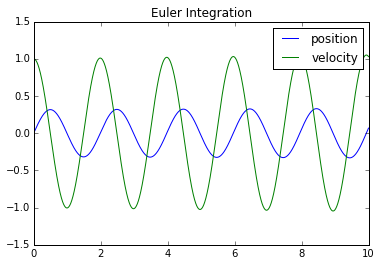

In [2]:
# Define parameters
k = 10.0
m = 1.0
X, V, TIME = euler(k = k, m = m, dt=0.001)
plt.title('Euler Integration')
plt.plot(TIME, X, label='position')
plt.plot(TIME, V, label='velocity')
plt.legend()

Now let's check performance on the position and velocity only at different values of $dt$. 

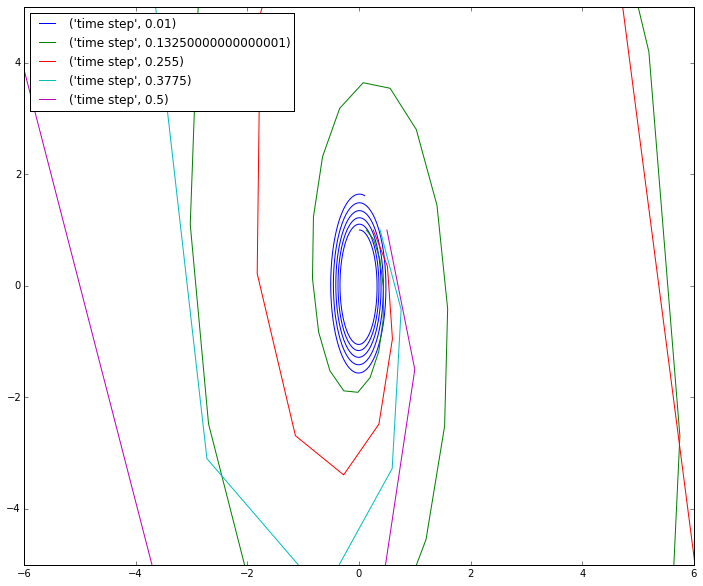

In [3]:
# Define parameters
k = 10.0
m = 1.0

dt_range = np.linspace(0.01, 0.5, 5)

plt.figure(figsize=(12, 10))
for dt in dt_range:
    X, V, TIME = euler(k=k, m=m, dt=dt)
    plt.plot(X, V, label=("time step",dt))

plt.axis('equal')
plt.axis([-5.0, 5.0, -5.0, 5.0])
plt.legend(loc=2)

In [6]:
def verlet(k , m, dt):
    # Declare the initial condition
    x = 0
    v = 1.0 
    T = 10.0
    num_iter = int(T/dt)
    
    # Create an array of time
    time = np.linspace(0.0, T, T/dt)
    x_store = []
    v_store = []

    # Now start the integration
    for it in range(num_iter):
        # compute the acceleration
        a = -(k/m)*x
        if it==0:
            # Create a storage
            x_store = x
            v_store = v
            # Euler at the very start
            x = x + v*dt + 0.5*a*dt*dt
            v = v + a*dt
        else:
            # Create a storage
            x_store = np.append(x_store, x)
            v_store = np.append(v_store, v)
            x = 2*x_store[it] - x_store[it-1] + a*dt*dt
            v = (x - x_store[it])/dt
        
#         # Verlet
#         x = x + v*dt + 0.5*a*dt*dt*2
#         v = v + a*dt

#         # Store results
#         x_results.append(x)
#         v_results.append(v)
    
    # return
    return x_store, v_store, time

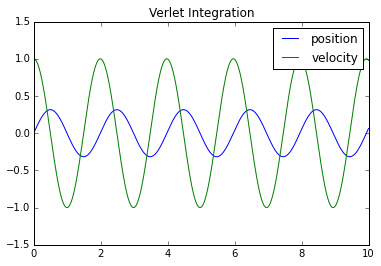

In [7]:
# Define parameters
k = 10.0
m = 1.0
X, V, TIME = verlet(k = k, m = m, dt=0.001)
plt.title('Verlet Integration')
plt.plot(TIME, X, label='position')
plt.plot(TIME, V, label='velocity')
plt.legend()

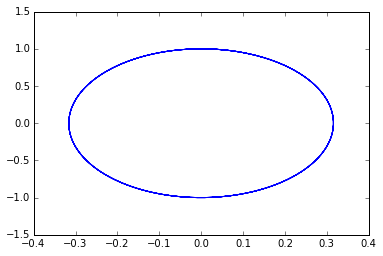

In [8]:
plt.plot(X, V)

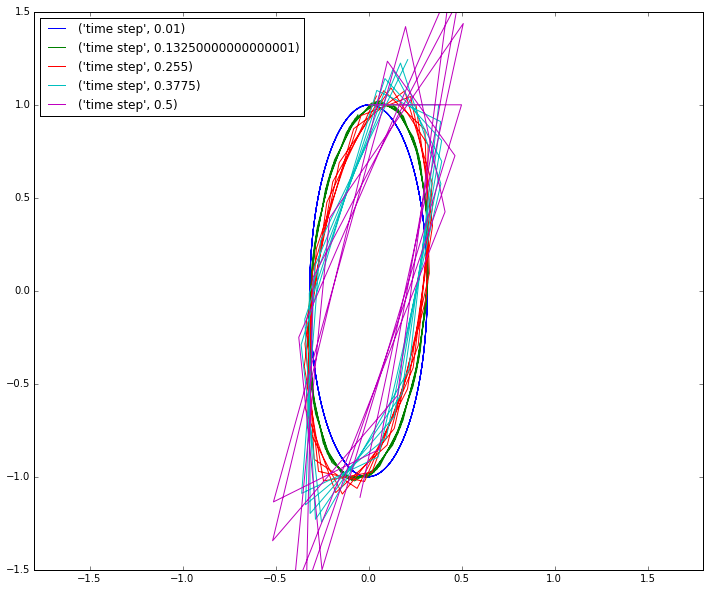

In [9]:
# Define parameters
k = 10.0
m = 1.0

dt_range = np.linspace(0.01, 0.5, 5)

plt.figure(figsize=(12, 10))
for dt in dt_range:
    X, V, TIME = verlet(k=k, m=m, dt=dt)
    plt.plot(X, V, label=("time step",dt))

plt.axis('equal')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.legend(loc=2)